In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.colors import ListedColormap
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9']
cmap = ListedColormap([np.array([0, 114.0/256, 178.0/256, 1]),
                       np.array([0, 158.0/256, 115.0/256, 1]),
                       np.array([213.0/256, 94.0/256, 0, 1]),
                       np.array([204.0/256, 121.0/256, 167.0/256, 1]),
                       np.array([86.0/256, 180.0/256, 233.0/256, 1])])

In [2]:
Trans = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190508_SCavPDHErrorSig/Trans3.txt',delimiter=',')
OUT1 = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190508_SCavPDHErrorSig/Out13.txt',delimiter=',')
Mixer = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190508_SCavPDHErrorSig/Mixer3.txt',delimiter=',')
Refl = np.loadtxt('/home/controls/Git/cit_ctnlab/ctn_labdata/data/20190508_SCavPDHErrorSig/Refl3.txt',delimiter=',')

In [3]:
Transpk = max(Trans[:,1])
OUT1pkpk = (max(OUT1[:,1])-min(OUT1[:,1]))*1e3
MixerChpkpk = (max(Mixer[:,1])-min(Mixer[:,1]))*1e3
Refldip = max(Refl[:,1])-min(Refl[:,1])

In [4]:
Pinc=1.694e-3
beta=0.373
Z=937.08   #From https://git.ligo.org/cit-ctnlab/ctn_labdata/tree/master/data/20181005_CTN_Lab_All_RFPD_TF_Data/CTN Photodiode TI Measurements.ipynb
Res=0.75
Gmix=0.506991
Gfil = 0.949511
MaxxVoltDiv=62.0/83.0

Vrf = 2*Pinc*Z*Res*beta
VOUT1 = Vrf*MaxxVoltDiv*Gmix*Gfil*1e3  #mV
Vmix = VOUT1*3.61   #mV

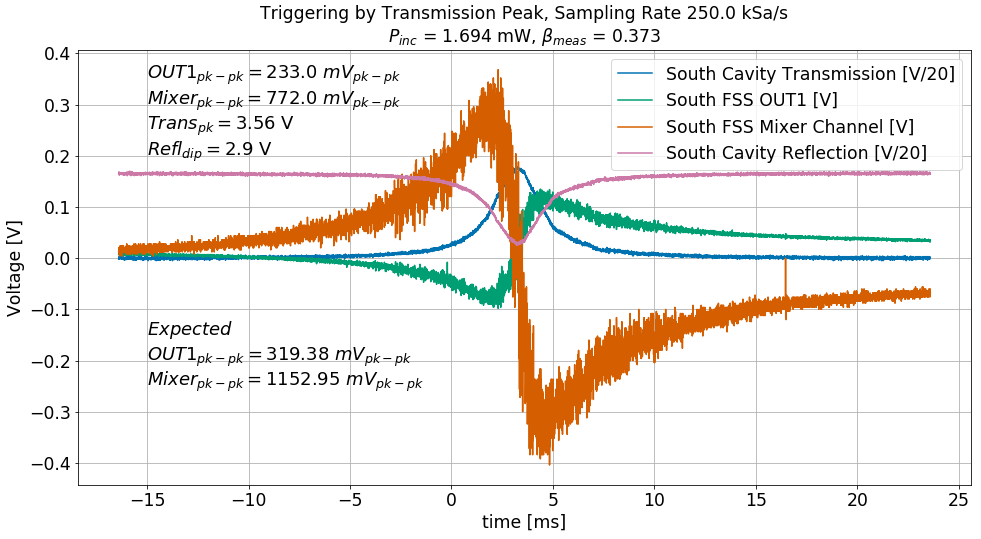

In [5]:
tt = Trans[:,0]*1e3
SR = 1/(tt[1]-tt[0])
fig = plt.figure(figsize=[16,8])
ax = fig.gca()
ax.plot(tt,Trans[:,1]/20, color = cList[0],label=r'South Cavity Transmission [V/20]')
ax.plot(tt,OUT1[:,1], color = cList[1],label=r'South FSS OUT1 [V]')
ax.plot(tt,Mixer[:,1], color = cList[2],label=r'South FSS Mixer Channel [V]')
ax.plot(tt,Refl[:,1]/20, color = cList[3],label=r'South Cavity Reflection [V/20]')
ax.set_title('Triggering by Transmission Peak, Sampling Rate '+str(np.round(SR,2))
             +' kSa/s\n'+r'$P_{inc}$ = 1.694 mW, $\beta_{meas}$ = 0.373')
ax.set_xlabel('time [ms]')
ax.set_ylabel('Voltage [V]')

ax.grid('on', which='both')
ax.grid(alpha=0.2, which='minor')
ax.legend()

ax.text(-15,0.35,r'$OUT1_{pk-pk} = $'+str(np.round(OUT1pkpk,2))+' $ mV_{pk-pk}$', fontsize=18)
ax.text(-15,0.3,r'$Mixer_{pk-pk} = $'+str(np.round(MixerChpkpk,2))+' $ mV_{pk-pk}$', fontsize=18)
ax.text(-15,0.25,r'$Trans_{pk} = $'+str(np.round(Transpk,2))+' V', fontsize=18)
ax.text(-15,0.2,r'$Refl_{dip} = $'+str(np.round(Refldip,2))+' V', fontsize=18)

#Expected values
ax.text(-15,-0.15,r'$Expected$', fontsize=18)
ax.text(-15,-0.2,r'$OUT1_{pk-pk} = $'+str(np.round(VOUT1,2))+' $ mV_{pk-pk}$', fontsize=18)
ax.text(-15,-0.25,r'$Mixer_{pk-pk} = $'+str(np.round(Vmix,2))+' $ mV_{pk-pk}$', fontsize=18)
figlist +=[fig]

In [6]:
pp = PdfPages('SCavPDHError20190508.pdf')
for fig in figlist:
    pp.savefig(fig,bbox_inches='tight')
pp.close()